# Analysez des données de systèmes éducatifs

# Importation des librairies

In [1]:
import pandas as pd                  # importation des librairies
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import ludo

import dtale


# Définir l'option pour afficher toutes les colonnes
pd.set_option('display.max_columns', None)

# Définir l'option pour afficher toutes les lignes
#pd.set_option('display.max_rows', None)

### Exploration et traitement du cvs `EdStatsSeries`

In [2]:
series = pd.read_csv('EdStatsSeries.csv')
series.sample(5)

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
1997,SABER.EMIS.GOAL1.LVL3,Education Management Information Systems (SABER),SABER: (Education Management Information Syste...,Data Interpretation: 1=Latent; 2=Emerging; 3=E...,Data Interpretation: 1=Latent; 2=Emerging; 3=E...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Systems Approach for Better Education Results ...,NaN,NaN,http://saber.worldbank.org/index.cfm,NaN,NaN,NaN,NaN
689,LO.EGRA.CWPM.SOM.3GRD,Learning Outcomes,EGRA: Correct Isolated Words Read Per Minute (...,Average total number of familiar words correct...,Average total number of familiar words correct...,NaN,NaN,NaN,EGRA,NaN,NaN,NaN,NaN,Early Grade Reading Assessment (EGRA): https:/...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
234,BAR.SEC.ICMP.6569.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 65-69 with...,Percentage of female population age 65-69 with...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1061,LO.LLECE.MAT6.MA,Learning Outcomes,LLECE: Mean performance on the mathematics sca...,Average score on the 6th grade mathematics ass...,Average score on the 6th grade mathematics ass...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Latin American Laboratory for Assessment of th...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
931,LO.EGRA.READ.0.ENG.3GRD,Learning Outcomes,EGRA: Reading Comprehension - Share of student...,Share of students who scored zero percent on t...,Share of students who scored zero percent on t...,NaN,NaN,NaN,EGRA,NaN,NaN,NaN,NaN,Early Grade Reading Assessment (EGRA): https:/...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
series.shape

(3665, 21)

In [4]:
series.columns

Index(['Series Code', 'Topic', 'Indicator Name', 'Short definition',
       'Long definition', 'Unit of measure', 'Periodicity', 'Base Period',
       'Other notes', 'Aggregation method', 'Limitations and exceptions',
       'Notes from original source', 'General comments', 'Source',
       'Statistical concept and methodology', 'Development relevance',
       'Related source links', 'Other web links', 'Related indicators',
       'License Type', 'Unnamed: 20'],
      dtype='object')

In [5]:
series.isna().mean()

Series Code                            0.000000
Topic                                  0.000000
Indicator Name                         0.000000
Short definition                       0.411733
Long definition                        0.000000
Unit of measure                        1.000000
Periodicity                            0.972988
Base Period                            0.914325
Other notes                            0.849386
Aggregation method                     0.987176
Limitations and exceptions             0.996180
Notes from original source             1.000000
General comments                       0.996180
Source                                 0.000000
Statistical concept and methodology    0.993724
Development relevance                  0.999181
Related source links                   0.941337
Other web links                        1.000000
Related indicators                     1.000000
License Type                           1.000000
Unnamed: 20                            1

In [6]:
series.drop(['Short definition','Unit of measure', 'Periodicity', 'Base Period',
       'Other notes', 'Aggregation method', 'Limitations and exceptions',
       'Notes from original source', 'General comments', 'Source',
       'Statistical concept and methodology', 'Development relevance',
       'Related source links', 'Other web links', 'Related indicators',
       'License Type', 'Unnamed: 20'], axis=1, inplace=True) 

In [7]:
series.info() # info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Series Code      3665 non-null   object
 1   Topic            3665 non-null   object
 2   Indicator Name   3665 non-null   object
 3   Long definition  3665 non-null   object
dtypes: object(4)
memory usage: 114.7+ KB


 Vérifions s'il existe des doublons pour la variable `Series Code` qui est un identifiant unique

In [8]:
series.duplicated('Indicator Name').sum()

0

In [9]:
series.groupby('Topic')['Indicator Name'].nunique().reset_index()


,Topic,Indicator Name
0,Attainment,733
1,Background,2
2,EMIS,2
3,Early Child Development (SABER),12
4,Early Childhood Education,24
5,Economic Policy & Debt: National accounts: Atl...,1
6,Economic Policy & Debt: National accounts: US$...,2
7,Economic Policy & Debt: National accounts: US$...,3
8,Economic Policy & Debt: Purchasing power parity,6
9,Education Equality,426


### Exploration et traitement du cvs `EdStatsData`

In [10]:
df = pd.read_csv('EdStatsData.csv')
df.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,60.999962,61.92268,62.69342,64.383186,65.617767,66.085152,66.608139,67.290451,68.510094,69.033211,69.944908,71.04187,71.693779,71.699097,71.995819,72.602837,70.032722,70.464821,72.645683,71.81176,73.903511,74.425201,75.110817,76.254318,77.245682,78.800522,80.051399,80.805389,81.607063,82.489487,82.685509,83.280342,84.011871,84.195961,85.211998,85.24514,86.101669,85.51194,85.320152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.tail(10)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
886920,Zimbabwe,ZWE,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.3.MA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1608.65,NaN,NaN,NaN,NaN,1873.55,NaN,NaN,2154.54,2413.51,2641.34,2826.96,2970.06,3060.45,3108.34,3124.32,3106.84,3078.78,3041.50,3000.74,2961.23,2924.73,2889.02,2851.65,2813.31,NaN
886921,Zimbabwe,ZWE,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.3.MF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3010.47,NaN,NaN,NaN,NaN,3596.51,NaN,NaN,4207.33,4779.36,5296.82,5729.49,6074.16,6314.43,6469.45,6558.41,6576.50,6572.10,6533.22,6469.39,6390.77,6303.34,6206.69,6100.56,5988.95,NaN
886922,Zimbabwe,ZWE,"Youth illiterate population, 15-24 years, % fe...",UIS.LPP.AG15T24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.083336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.969200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.61436,NaN,NaN,35.88710,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886923,Zimbabwe,ZWE,"Youth illiterate population, 15-24 years, both...",UIS.LP.AG15T24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,164719.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102022.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,295605.00000,NaN,NaN,311114.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886924,Zimbabwe,ZWE,"Youth illiterate population, 15-24 years, fema...",UIS.LP.AG15T24.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117088.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63222.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,128926.00000,NaN,NaN,111650.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886925,Zimbabwe,ZWE,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47631.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38800.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,166679.00000,NaN,NaN,199464.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886926,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.021851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.411362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.93070,NaN,NaN,90.42812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886927,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.812241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.353439,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.12456,NaN,NaN,93.18835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886928,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.903920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.977340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.02828,NaN,NaN,1.06389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886929,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, m...",SE.ADT.1

In [12]:
df.shape

(886930, 70)

In [13]:
df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object')

In [14]:
df.info() # info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

In [15]:
df.describe(include='all') # aperçu global 

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
count,886930,886930,886930,886930,7.228800e+04,3.553700e+04,3.561900e+04,3.554500e+04,3.573000e+04,8.730600e+04,3.748300e+04,3.757400e+04,3.757600e+04,3.680900e+04,8.912200e+04,3.877700e+04,3.751100e+04,3.846000e+04,3.860600e+04,9.029600e+04,3.937200e+04,3.864100e+04,3.855200e+04,3.754000e+04,1.244050e+05,7.443700e+04,7.554300e+04,7.579300e+04,7.746200e+04,1.313610e+05,7.680700e+04,7.345300e+04,8.491400e+04,1.188390e+05,1.766760e+05,1.235090e+05,1.242050e+05,1.303630e+05,1.288140e+05,1.841080e+05,1.403120e+05,1.372720e+05,1.343870e+05,1.421080e+05,2.424420e+05,1.460120e+05,1.472640e+05,1.375090e+05,1.137890e+05,1.310580e+05,1.646000e+04,143.000000,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,0.0
unique,242,242,3665,3665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3665,3665,242,242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,1.974772e+09,4.253638e+09,4.592365e+09,5.105006e+09,5.401493e+09,2.314288e+09,5.731808e+09,6.124437e+09,6.671489e+09,7.436724e+09,3.283898e+09,7.664969e+09,7.913722e+09,7.856908e+09,8.118002e+09,3.622763e+09,9.156550e+09,1.014901e+10,1.104709e+10,1.195436e+10,9.084424e+09,1.571674e+10,1.604668e+10,1.643532e+10,1.684022e+10,1.052543e+10,1.874630e+10,2.027385e+10,1.794678e+10,1.331558e+10,9.423384e+09,1.384867e+10,1.428299e+10,1.449393e+10,1.589729e+10,1.188637e+10,1.684674e+10,1.872300e+10,2.029794e+10,1.894907e+10,1.189592e+10,2.117911e+10,2.176323e+10,2.425332e+10,2.678449e+10,2.353720e+10,1.934411e+11,2.160839,5.780697e+02,6.054774e+02,6.315916e+02,6.556516e+02,6.751516e+02,6.911287e+02,7.040640e+02,7.145788e+02,7.224868e+02,7.271290e+02,7.283779e+02,7.266484e+02,7.228327e+02,7.176899e+02,7.113072e+02,7.034274e+02,6.940296e+02,NaN
std,NaN,NaN,NaN,NaN,1.211687e+11,1.804814e+11,1.914083e+11,2.059170e+11,2.112150e+11,1.375059e+11,2.215546e+11,2.325489e+11,2.473986e+11,2.660957e+11,1.780774e+11,2.744142e+11,2.790549e+11,2.823809e+11,2.940635e+11,2.002929e+11,3.264675e+11,3.535351e+11,3.804257e+11,4.014873e+11,3.665667e+11,4.881357e+11,5.012055e+11,5.121962e+11,5.292982e+11,4.285218e+11,5.812586e+11,6.142357e+11,5.859148e+11,5.153472e+11,4.442374e+11,5.449242e+11,5.622886e+11,5.803607e+11,6.278337e+11,5.576181e+11,6.851484e+11,7.465688e+11,7.944132e+11,7.623650e+11,6.218710e+11,8.555853e+11,8.833955e+11,9.513016e+11,1.023180e+12,9.732465e+11,2.839188e+12,0.810584,1.475072e+04,1.577305e+04,1.678556e+04,1.778666e+04,1.874408e+04,1.965409e+04,2.052941e+04,2.136851e+04,2.215845e+04,2.287990e+04,2.352338e+04,2.408149e+04,2.455897e+04,2.496587e+04,2.530183e+04,2.556069e+04,2.574189e+04,NaN
min,NaN,NaN,NaN,NaN,-1.435564e+00,-1.594625e+00,-3.056522e+00,-4.032582e

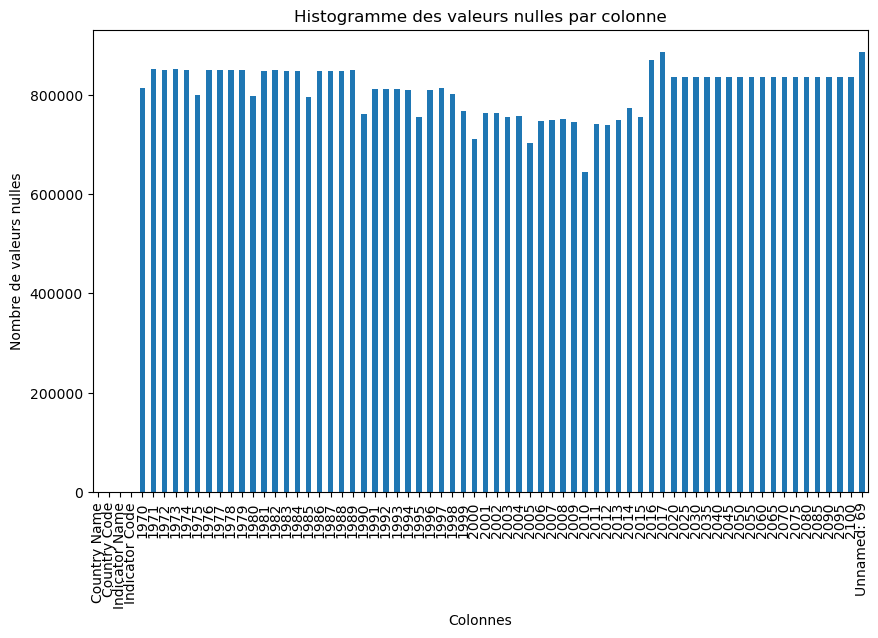

In [16]:
valeurs_nulles = df.isnull().sum()

# Créez un graphique à barres pour afficher les valeurs nulles par colonne
valeurs_nulles.plot(kind='bar', figsize=(10, 6))
plt.title('Histogramme des valeurs nulles par colonne')
plt.xlabel('Colonnes')
plt.ylabel('Nombre de valeurs nulles')
plt.show()

In [17]:
df.isna().mean()

Country Name      0.000000
Country Code      0.000000
Indicator Name    0.000000
Indicator Code    0.000000
1970              0.918496
                    ...   
2085              0.942007
2090              0.942007
2095              0.942007
2100              0.942007
Unnamed: 69       1.000000
Length: 70, dtype: float64

### Suppression des colonnes

In [18]:
df.drop(['Indicator Code','1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999','2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69','2017','2020'], axis=1, inplace=True) 

In [19]:
df.shape

(886930, 20)

### Nous comptons le nombres de valeurs nulles par lignes et créons un colonne `nbnan1`

In [20]:
df['nbnan1'] = df.isna().sum(axis=1)
df = df.sort_values('nbnan1', ascending=False)

In [21]:
df.head(5)

,Country Name,Country Code,Indicator Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,nbnan1
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
726273,Slovenia,SVN,DHS: Primary completion rate. Quintile 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
387140,Guinea,GIN,Population of the official age for post-second...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
387141,Guinea,GIN,Population of the official age for post-second...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
726277,Slovenia,SVN,DHS: Primary completion rate. Rural,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17


In [22]:
len(df.loc[df['nbnan1'] == 17 , :])

538245

> Nous supprimons ces lignes qui ne contiennent que des NAN

In [23]:
# Créez un masque booléen
masque_nan =df['nbnan1'] == 17

In [24]:
df = df[~masque_nan]

In [25]:
df.shape

(348685, 21)

In [26]:
df.head(50)

,Country Name,Country Code,Indicator Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,nbnan1
309256,El Salvador,SLV,LLECE: 3rd grade students by reading proficien...,NaN,NaN,NaN,NaN,NaN,NaN,5.343220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16
413737,Iceland,ISL,UIS: Percentage of population age 25+ with unk...,NaN,NaN,NaN,NaN,NaN,4.302969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16
130195,Australia,AUS,Percentage of graduates from tertiary ISCED 7 ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.959099,NaN,NaN,16
130194,Australia,AUS,Percentage of graduates from tertiary ISCED 6 ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.323341,NaN,NaN,16
309255,El Salvador,SLV,LLECE: 3rd grade students by mathematics profi...,NaN,NaN,NaN,NaN,NaN,NaN,3.639780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16
656693,Philippines,PHL,DHS: Typology of out-of-school children. Prima...,NaN,NaN,NaN,73.347831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16
656702,Philippines,PHL,DHS: Typology of out-of-school children. Prima...,NaN,NaN,NaN,35.373627,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16
785927,Syrian Arab Republic,SYR,MICS: Typology of out-of-school children. Prim...,NaN,NaN,NaN,NaN,NaN,NaN,46.112378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16
309257,El Salvador,SLV,LLECE: 3rd grade students by reading proficien...,NaN,NaN,NaN,NaN,NaN,NaN,29.054970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16
785926,Syrian Arab Republic,SYR,MICS: Typology of out-of-school children. Prim...,NaN,NaN,NaN,NaN,NaN,NaN,28.604908,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16


### Merge series et df

In [27]:
df_series = pd.merge(df, series, on='Indicator Name',how='left',indicator='true',validate='m:1')

In [28]:
df_series.head(5)

,Country Name,Country Code,Indicator Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,nbnan1,Series Code,Topic,Long definition,true
0,El Salvador,SLV,LLECE: 3rd grade students by reading proficien...,NaN,NaN,NaN,NaN,NaN,NaN,5.34322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,LO.LLECE.REA3.0,Learning Outcomes,Percentage of 3rd grade students below the low...,both
1,Iceland,ISL,UIS: Percentage of population age 25+ with unk...,NaN,NaN,NaN,NaN,NaN,4.302969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,UIS.EA.UK.AG25T99.F,Attainment,The percentage of the female population (age 2...,both
2,Australia,AUS,Percentage of graduates from tertiary ISCED 7 ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.959099,NaN,NaN,16,UIS.FGP.7,Tertiary,Number of female students completing masters o...,both
3,Australia,AUS,Percentage of graduates from tertiary ISCED 6 ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.323341,NaN,NaN,16,UIS.FGP.6,Tertiary,Number of female students completing bachelors...,both
4,El Salvador,SLV,LLECE: 3rd grade students by mathematics profi...,NaN,NaN,NaN,NaN,NaN,NaN,3.63978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,LO.LLECE.MAT3.4,Learning Outcomes,Percentage of 3rd grade students scoring 621.6...,both


In [29]:
df_series.shape

(348685, 25)

In [30]:
df_series['true'].value_counts() 

true
both          281689
left_only      66996
right_only         0
Name: count, dtype: int64

In [31]:
df_series.isna().mean()

Country Name       0.000000
Country Code       0.000000
Indicator Name     0.000000
2000               0.493308
2001               0.645786
2002               0.643790
2003               0.626130
2004               0.630572
2005               0.471993
2006               0.597597
2007               0.606315
2008               0.614589
2009               0.592446
2010               0.304696
2011               0.581250
2012               0.577659
2013               0.605635
2014               0.673662
2015               0.624136
2016               0.952794
nbnan1             0.000000
Series Code        0.192139
Topic              0.192139
Long definition    0.192139
true               0.000000
dtype: float64

In [32]:
df_series.drop(['Series Code','nbnan1','true'], axis=1, inplace=True) 

### Exploration de la colonne `Indicator Name`

In [33]:
len(df_series['Indicator Name'].unique())

3636

> Il y a 3653 indicateurs differents

In [34]:
df_series['Indicator Name'].value_counts()

Indicator Name
Population, total                                                                                    240
Population growth (annual %)                                                                         240
GDP per capita (current US$)                                                                         234
GDP at market prices (current US$)                                                                   234
Internet users (per 100 people)                                                                      230
                                                                                                    ... 
EGRA: Reading Comprehension - Share of students scoring at least 80 percent (%). Nzema. 2nd Grade      1
EGRA: Reading Comprehension - Share of students with a zero score (%). Akuapem. 2nd Grade              1
EGRA: Reading Comprehension - Share of students scoring at least 80 percent (%). Kasem. 2nd Grade      1
EGRA: Reading Comprehension - Share of s

### Selection des variables sur lesquelles nous allons travailler

In [35]:
indicator_ok = ['Population, total',
                'Internet users (per 100 people)',
                'Personal computers (per 100 people)',
                "Percentage of students in upper secondary education enrolled in general programmes, both sexes (%)"]

on supprime 'Adult literacy rate, population 15+ years, both sexes (%)'

In [36]:
#indicok = ['Adjusted net enrolment rate, upper secondary, both sexes (%)',
 #        'Adult literacy rate, population 15+ years, both sexes (%)',
  #       'Barro-Lee: Population in thousands, age 15+, total']

In [37]:
df_series = df_series.loc[df_series['Indicator Name'].isin(indicator_ok), :]

In [38]:
df_series.reset_index(drop=True, inplace=True)

In [39]:
df_series.shape

(909, 22)

In [40]:
df_series.head(10)

,Country Name,Country Code,Indicator Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,Topic,Long definition
0,Gibraltar,GIB,Personal computers (per 100 people),54.842602,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Infrastructure: Communications,Personal computers are self-contained computer...
1,Sierra Leone,SLE,Percentage of students in upper secondary educ...,NaN,69.886162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Secondary,Total number of students enrolled in general p...
2,Puerto Rico,PRI,Percentage of students in upper secondary educ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.368874,NaN,NaN,NaN,Secondary,Total number of students enrolled in general p...
3,Curacao,CUW,Percentage of students in upper secondary educ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.333328,NaN,NaN,NaN,Secondary,Total number of students enrolled in general p...
4,Turkmenistan,TKM,Percentage of students in upper secondary educ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.299271,NaN,NaN,Secondary,Total number of students enrolled in general p...
5,Iraq,IRQ,Personal computers (per 100 people),NaN,NaN,0.792447,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Infrastructure: Communications,Personal computers are self-contained computer...
6,Belarus,BLR,Personal computers (per 100 people),NaN,NaN,NaN,NaN,NaN,0.817567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Infrastructure: Communications,Personal computers are self-contained computer...
7,Somalia,SOM,Percentage of students in upper secondary educ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Secondary,Total number of students enrolled in general p...
8,Tuvalu,TUV,Percentage of students in upper secondary educ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,NaN,NaN,Secondary,Total number of students enrolled in general p...
9,Trinidad and Tobago,TTO,Percentage of students in upper secondary educ...,NaN,NaN,NaN,NaN,97.992981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Secondary,Total number of students enrolled in general p...


### Valeurs nan

In [41]:
df_series.isna().mean()

Country Name       0.000000
Country Code       0.000000
Indicator Name     0.000000
2000               0.102310
2001               0.078108
2002               0.073707
2003               0.086909
2004               0.073707
2005               0.083608
2006               0.179318
2007               0.239824
2008               0.268427
2009               0.294829
2010               0.302530
2011               0.295930
2012               0.301430
2013               0.311331
2014               0.347635
2015               0.491749
2016               0.499450
Topic              0.000000
Long definition    0.000000
dtype: float64

### Recherche de doublons

In [42]:
df_series[df_series.duplicated()]

,Country Name,Country Code,Indicator Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,Topic,Long definition


> Il n y a pas de doublons

### Exploration du df avec notre fonction `ludo`

In [43]:
ludo.explore(df_series)

############################################ 

Shape is :........  (909, 22) 

############################################ 

Culumns 

Index(['Country Name', 'Country Code', 'Indicator Name', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', 'Topic',
       'Long definition'],
      dtype='object') 

############################################ 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909 entries, 0 to 908
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country Name     909 non-null    object 
 1   Country Code     909 non-null    object 
 2   Indicator Name   909 non-null    object 
 3   2000             816 non-null    float64
 4   2001             838 non-null    float64
 5   2002             842 non-null    float64
 6   2003             830 non-null    float64
 7   2004             842 non-n

,Country Name,Country Code,Indicator Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,Topic,Long definition
count,909,909,909,8.160000e+02,8.380000e+02,8.420000e+02,8.300000e+02,8.420000e+02,8.330000e+02,7.460000e+02,6.910000e+02,6.650000e+02,6.410000e+02,6.340000e+02,6.400000e+02,6.350000e+02,6.260000e+02,5.930000e+02,4.620000e+02,4.550000e+02,909,909
unique,241,241,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,4
top,Gibraltar,GIB,"Population, total",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Infrastructure: Communications,Total population is based on the de facto defi...
freq,4,4,240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,446,240
mean,NaN,NaN,NaN,5.044615e+07,4.977287e+07,5.018270e+07,5.156771e+07,5.148823e+07,5.271212e+07,5.961038e+07,6.517132e+07,6.858074e+07,7.204677e+07,7.375358e+07,7.396069e+07,7.545765e+07,7.749393e+07,7.916670e+07,1.028829e+08,1.057651e+08,NaN,NaN
std,NaN,NaN,NaN,3.701615e+08,3.701467e+08,3.740248e+08,3.814551e+08,3.835413e+08,3.903922e+08,4.172250e+08,4.384961e+08,4.522870e+08,4.661116e+08,4.742955e+08,4.777604e+08,4.853585e+08,4.946279e+08,5.112168e+08,5.842140e+08,5.955413e+08,NaN,NaN
min,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e-01,9.900000e-01,1.083733e+00,1.177119e+00,NaN,NaN
25%,NaN,NaN,NaN,2.942006e+00,2.983676e+00,4.021653e+00,4.922347e+00,6.219318e+00,7.907008e+00,1.560976e+01,2.231444e+01,2.753000e+01,3.631435e+01,4.060136e+01,4.313943e+01,4.728800e+01,4.968838e+01,5.007000e+01,5.052636e+01,5.361339e+01,NaN,NaN
50%,NaN,NaN,NaN,4.301451e+01,4.224208e+01,4.487962e+01,5.048499e+01,5.300095e+01,5.697833e+01,6.892362e+01,7.746957e+01,8.111691e+01,8.475576e+01,8.441808e+01,8.497153e+01,8.533519e+01,8.788566e+01,8.779296e+01,1.614450e+04,3.490000e+04,NaN,NaN
75%,NaN,NaN,NaN,1.921048e+05,1.384428e+05,1.236550e+05,1.562950e+05,1.271620e+05,1.556300e+05,7.302578e+05,1.514154e+06,2.106375e+06,2.888584e+06,3.083326e+06,3.068849e+06,3.191664e+06,3.584449e+06,3.903986e+06,8.612040e+06,9.191240e+06,NaN,NaN


############################################ 

Sum of missing values 

Country Name         0
Country Code         0
Indicator Name       0
2000                93
2001                71
2002                67
2003                79
2004                67
2005                76
2006               163
2007               218
2008               244
2009               268
2010               275
2011               269
2012               274
2013               283
2014               316
2015               447
2016               454
Topic                0
Long definition      0
dtype: int64
############################################ 

Missing values ratio 

Country Name       0.000000
Country Code       0.000000
Indicator Name     0.000000
2000               0.102310
2001               0.078108
2002               0.073707
2003               0.086909
2004               0.073707
2005               0.083608
2006               0.179318
2007               0.239824
2008               0.268427
2009

In [44]:
ordre_colonnes = ['Country Name', 'Country Code', 'Indicator Name','Topic','Long definition','2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016']

# Réorganisez les colonnes selon l'ordre spécifié
df_series = df_series[ordre_colonnes]

In [45]:
df_series.head(5)

,Country Name,Country Code,Indicator Name,Topic,Long definition,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Gibraltar,GIB,Personal computers (per 100 people),Infrastructure: Communications,Personal computers are self-contained computer...,54.842602,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Sierra Leone,SLE,Percentage of students in upper secondary educ...,Secondary,Total number of students enrolled in general p...,NaN,69.886162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Puerto Rico,PRI,Percentage of students in upper secondary educ...,Secondary,Total number of students enrolled in general p...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.368874,NaN,NaN,NaN
3,Curacao,CUW,Percentage of students in upper secondary educ...,Secondary,Total number of students enrolled in general p...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.333328,NaN,NaN,NaN
4,Turkmenistan,TKM,Percentage of students in upper secondary educ...,Secondary,Total number of students enrolled in general p...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.299271,NaN,NaN


### Derniere valeurs

In [46]:
def derniere_valeur_non_nulle(ligne):
    return ligne.dropna().iloc[-1] if not ligne.dropna().empty else np.nan

# Appliquez cette fonction à chaque ligne du DataFrame
df_series['lastnotnan'] = df_series.apply(derniere_valeur_non_nulle, axis=1)

In [47]:
# Définissez une option pour afficher les nombres en format décimal
pd.set_option('display.float_format', '{:.2f}'.format)

In [48]:
df_series

,Country Name,Country Code,Indicator Name,Topic,Long definition,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,lastnotnan
0,Gibraltar,GIB,Personal computers (per 100 people),Infrastructure: Communications,Personal computers are self-contained computer...,54.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.84
1,Sierra Leone,SLE,Percentage of students in upper secondary educ...,Secondary,Total number of students enrolled in general p...,NaN,69.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.89
2,Puerto Rico,PRI,Percentage of students in upper secondary educ...,Secondary,Total number of students enrolled in general p...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.37,NaN,NaN,NaN,95.37
3,Curacao,CUW,Percentage of students in upper secondary educ...,Secondary,Total number of students enrolled in general p...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.33,NaN,NaN,NaN,33.33
4,Turkmenistan,TKM,Percentage of students in upper secondary educ...,Secondary,Total number of students enrolled in general p...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.30,NaN,NaN,78.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904,Samoa,WSM,"Population, total",Health: Population: Structure,Total population is based on the de facto defi...,174610.00,175566.00,176582.00,177662.00,178781.00,179929.00,181094.00,182286.00,183526.00,184826.00,186205.00,187665.00,189194.00,190757.00,192290.00,193759.00,195125.00,195125.00
905,Sub-Saharan Africa,SSF,"Population, total",Health: Population: Structure,Total population is based on the de facto defi...,669818179.00,687543926.00,705929159.88,724910083.90,744542423.99,764866591.24,785905014.48,807656829.99,830111000.30,853238652.11,877023136.36,901455755.36,926548177.08,952278631.61,978625081.74,1005570800.68,1033106135.00,1033106135.00
906,Niger,NER,Internet users (per 100 people),Infrastructure: Communications,Internet users are individuals who have used t...,0.04,0.11,0.13,0.16,0.19,0.22,0.29,0.39,0.70,0.76,0.83,1.30,1.41,1.70,1.95,2.48,4.32,4.32
907,Equatorial Guinea,GNQ,Internet users (per 100 people),Infrastructure: Communications,Internet users are individuals who have used t...,0.13,0.17,0.32,0.52,0.84,1.15,1.28,1.56,1.82,2.13,6.00,11.50,13.94,16.40,18.86,21.32,23.78,23.78


In [49]:
df_series.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Topic',
       'Long definition', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', 'lastnotnan'],
      dtype='object')

In [50]:
df_series.drop(['2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016','Topic','Long definition'], axis=1, inplace=True) 

In [51]:
df_series

,Country Name,Country Code,Indicator Name,lastnotnan
0,Gibraltar,GIB,Personal computers (per 100 people),54.84
1,Sierra Leone,SLE,Percentage of students in upper secondary educ...,69.89
2,Puerto Rico,PRI,Percentage of students in upper secondary educ...,95.37
3,Curacao,CUW,Percentage of students in upper secondary educ...,33.33
4,Turkmenistan,TKM,Percentage of students in upper secondary educ...,78.30
...,...,...,...,...
904,Samoa,WSM,"Population, total",195125.00
905,Sub-Saharan Africa,SSF,"Population, total",1033106135.00
906,Niger,NER,Internet users (per 100 people),4.32
907,Equatorial Guinea,GNQ,Internet users (per 100 people),23.78


In [52]:
df_series.describe(include='all') # aperçu global 

,Country Name,Country Code,Indicator Name,lastnotnan
count,909,909,909,909.00
unique,241,241,4,NaN
top,Gibraltar,GIB,"Population, total",NaN
freq,4,4,240,NaN
mean,NaN,NaN,NaN,55310509.97
std,NaN,NaN,NaN,426689573.42
min,NaN,NaN,NaN,0.00
25%,NaN,NaN,NaN,25.51
50%,NaN,NaN,NaN,73.30
75%,NaN,NaN,NaN,55023.00


In [53]:
df_series.isna().sum()

Country Name      0
Country Code      0
Indicator Name    0
lastnotnan        0
dtype: int64

In [54]:
group1 = df_series.groupby('Country Name').count().sort_values('Indicator Name')

In [55]:
group1

,Country Code,Indicator Name,lastnotnan
Country Name,,,
South Sudan,1,1,1
St. Martin (French part),1,1,1
American Samoa,1,1,1
Channel Islands,1,1,1
Nauru,1,1,1
...,...,...,...
Guyana,4,4,4
Heavily indebted poor countries (HIPC),4,4,4
High income,4,4,4


In [56]:
liste_pays_moins_4 = group1[group1['Indicator Name'] < 4].index.tolist()

In [57]:
len(liste_pays_moins_4)

33

In [58]:
masque_pays = df_series['Country Name'].isin(liste_pays_moins_4)

In [59]:
df_series = df_series[~masque_pays]

In [60]:
df_series

,Country Name,Country Code,Indicator Name,lastnotnan
0,Gibraltar,GIB,Personal computers (per 100 people),54.84
2,Puerto Rico,PRI,Percentage of students in upper secondary educ...,95.37
4,Turkmenistan,TKM,Percentage of students in upper secondary educ...,78.30
5,Iraq,IRQ,Personal computers (per 100 people),0.79
6,Belarus,BLR,Personal computers (per 100 people),0.82
...,...,...,...,...
904,Samoa,WSM,"Population, total",195125.00
905,Sub-Saharan Africa,SSF,"Population, total",1033106135.00
906,Niger,NER,Internet users (per 100 people),4.32
907,Equatorial Guinea,GNQ,Internet users (per 100 people),23.78


In [61]:
df_series.describe(include='all') # aperçu global 

,Country Name,Country Code,Indicator Name,lastnotnan
count,832,832,832,832.00
unique,208,208,4,NaN
top,Gibraltar,GIB,Personal computers (per 100 people),NaN
freq,4,4,208,NaN
mean,NaN,NaN,NaN,59974824.56
std,NaN,NaN,NaN,445673857.02
min,NaN,NaN,NaN,0.02
25%,NaN,NaN,NaN,24.44
50%,NaN,NaN,NaN,71.06
75%,NaN,NaN,NaN,2849.25


> Nous avons bien nos 241 pays unique moins 33 = 208 pays unique

In [62]:
df_series

,Country Name,Country Code,Indicator Name,lastnotnan
0,Gibraltar,GIB,Personal computers (per 100 people),54.84
2,Puerto Rico,PRI,Percentage of students in upper secondary educ...,95.37
4,Turkmenistan,TKM,Percentage of students in upper secondary educ...,78.30
5,Iraq,IRQ,Personal computers (per 100 people),0.79
6,Belarus,BLR,Personal computers (per 100 people),0.82
...,...,...,...,...
904,Samoa,WSM,"Population, total",195125.00
905,Sub-Saharan Africa,SSF,"Population, total",1033106135.00
906,Niger,NER,Internet users (per 100 people),4.32
907,Equatorial Guinea,GNQ,Internet users (per 100 people),23.78


### Pivot


In [63]:
df2 = df_series.pivot_table(index=['Country Name','Country Code'], columns='Indicator Name', values='lastnotnan')

In [64]:
df2

,Indicator Name,Internet users (per 100 people),"Percentage of students in upper secondary education enrolled in general programmes, both sexes (%)",Personal computers (per 100 people),"Population, total"
Country Name,Country Code,,,,
Afghanistan,AFG,10.60,97.42,0.39,34656032.00
Albania,ALB,66.36,82.44,4.59,2876101.00
Algeria,DZA,42.95,90.28,1.03,40606052.00
Angola,AGO,13.00,26.63,0.65,28813463.00
Antigua and Barbuda,ATG,73.00,100.00,20.97,100963.00
...,...,...,...,...,...
"Venezuela, RB",VEN,60.00,85.05,9.26,31568179.00
West Bank and Gaza,PSE,61.18,98.08,5.48,4551566.00
World,WLD,45.91,77.57,15.09,7442135578.00


In [65]:
df2.columns.name = None

In [66]:
df2 = df2.reset_index(drop=False)

In [67]:
df2

,Country Name,Country Code,Internet users (per 100 people),"Percentage of students in upper secondary education enrolled in general programmes, both sexes (%)",Personal computers (per 100 people),"Population, total"
0,Afghanistan,AFG,10.60,97.42,0.39,34656032.00
1,Albania,ALB,66.36,82.44,4.59,2876101.00
2,Algeria,DZA,42.95,90.28,1.03,40606052.00
3,Angola,AGO,13.00,26.63,0.65,28813463.00
4,Antigua and Barbuda,ATG,73.00,100.00,20.97,100963.00
...,...,...,...,...,...,...
203,"Venezuela, RB",VEN,60.00,85.05,9.26,31568179.00
204,West Bank and Gaza,PSE,61.18,98.08,5.48,4551566.00
205,World,WLD,45.91,77.57,15.09,7442135578.00
206,"Yemen, Rep.",YEM,24.58,98.34,2.90,27584213.00


In [68]:
df2.isna().mean()

Country Name                                                                                         0.00
Country Code                                                                                         0.00
Internet users (per 100 people)                                                                      0.00
Percentage of students in upper secondary education enrolled in general programmes, both sexes (%)   0.00
Personal computers (per 100 people)                                                                  0.00
Population, total                                                                                    0.00
dtype: float64

In [69]:
df2['Country Name'].tolist()

['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Antigua and Barbuda',
 'Arab World',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas, The',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'East Asia & Pacific',
 'East Asia & Pacific (excluding high income)',
 'Ecuador',
 'Egypt, Arab Rep.',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Euro area',
 'Europe & Central Asia',
 'Europe & Central Asia (excluding high inco

In [70]:
df2

,Country Name,Country Code,Internet users (per 100 people),"Percentage of students in upper secondary education enrolled in general programmes, both sexes (%)",Personal computers (per 100 people),"Population, total"
0,Afghanistan,AFG,10.60,97.42,0.39,34656032.00
1,Albania,ALB,66.36,82.44,4.59,2876101.00
2,Algeria,DZA,42.95,90.28,1.03,40606052.00
3,Angola,AGO,13.00,26.63,0.65,28813463.00
4,Antigua and Barbuda,ATG,73.00,100.00,20.97,100963.00
...,...,...,...,...,...,...
203,"Venezuela, RB",VEN,60.00,85.05,9.26,31568179.00
204,West Bank and Gaza,PSE,61.18,98.08,5.48,4551566.00
205,World,WLD,45.91,77.57,15.09,7442135578.00
206,"Yemen, Rep.",YEM,24.58,98.34,2.90,27584213.00


### Exploration et traitement du cvs `EdStatsCountry`



In [71]:
country = pd.read_csv('EdStatsCountry.csv')
country.head(5)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,2000,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1993 System of National Accou...,NaN,NaN,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.00,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,2002/03,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accou...,NaN,NaN,NaN,Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.00,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,2002,NaN,Value added at producer prices (VAP),IBRD,NaN,Country uses the 1993 System of National Accou...,1991–96,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Budgetary central government,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,Original chained constant price data are resca...,1996.00,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1993 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",Actual,General trade system,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.00,2012.00,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,1990,NaN,NaN,NaN,NaN,Country uses the 1968 System of National Accou...,NaN,NaN,NaN,NaN,Special trade system,NaN,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.00,NaN,NaN


In [72]:
country.shape


(241, 32)

In [73]:
country.columns

Index(['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code',
       'National accounts base year', 'National accounts reference year',
       'SNA price valuation', 'Lending category', 'Other groups',
       'System of National Accounts', 'Alternative conversion factor',
       'PPP survey year', 'Balance of Payments Manual in use',
       'External debt Reporting status', 'System of trade',
       'Government Accounting concept', 'IMF data dissemination standard',
       'Latest population census', 'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data',
       'Latest water withdrawal data', 'Unnamed: 31'],
      dtype='object')

### Suppression des colonnes

In [74]:
country.drop(['Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes', 'Income Group', 'WB-2 code',
       'National accounts base year', 'National accounts reference year',
       'SNA price valuation', 'Lending category', 'Other groups',
       'System of National Accounts', 'Alternative conversion factor',
       'PPP survey year', 'Balance of Payments Manual in use',
       'External debt Reporting status', 'System of trade',
       'Government Accounting concept', 'IMF data dissemination standard',
       'Latest population census', 'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data',
       'Latest water withdrawal data', 'Unnamed: 31'], axis=1, inplace=True) 

In [75]:
country.head(5)

,Country Code,Short Name,Region
0,ABW,Aruba,Latin America & Caribbean
1,AFG,Afghanistan,South Asia
2,AGO,Angola,Sub-Saharan Africa
3,ALB,Albania,Europe & Central Asia
4,AND,Andorra,Europe & Central Asia


### Valeurs nan

In [76]:
country.isna().mean()

Country Code   0.00
Short Name     0.00
Region         0.11
dtype: float64

In [77]:
# créer un masque booléen pour identifier les valeurs manquantes
mask_country = country.isna().any(axis=1)

# filtrer le DataFrame pour afficher les lignes avec des NaN
nan_country = country[mask_country]

#### Affiche les nan

In [78]:
nan_country

,Country Code,Short Name,Region
5,ARB,Arab World,NaN
57,EAP,East Asia & Pacific (developing only),NaN
58,EAS,East Asia & Pacific (all income levels),NaN
59,ECA,Europe & Central Asia (developing only),NaN
60,ECS,Europe & Central Asia (all income levels),NaN
63,EMU,Euro area,NaN
68,EUU,European Union,NaN
78,GIB,Gibraltar,NaN
89,HIC,High income,NaN
92,HPC,Heavily indebted poor countries (HIPC),NaN


In [79]:
nan_country.shape

(27, 3)

> Supprime les pays avec nan

In [80]:
country = country[~mask_country]

In [81]:
country

,Country Code,Short Name,Region
0,ABW,Aruba,Latin America & Caribbean
1,AFG,Afghanistan,South Asia
2,AGO,Angola,Sub-Saharan Africa
3,ALB,Albania,Europe & Central Asia
4,AND,Andorra,Europe & Central Asia
...,...,...,...
236,XKX,Kosovo,Europe & Central Asia
237,YEM,Yemen,Middle East & North Africa
238,ZAF,South Africa,Sub-Saharan Africa
239,ZMB,Zambia,Sub-Saharan Africa


### Recherche de doublons

In [82]:
country[country.duplicated()]

,Country Code,Short Name,Region


> Il n y a pas de doublons

### Jointures

In [83]:
df2.head(5)

,Country Name,Country Code,Internet users (per 100 people),"Percentage of students in upper secondary education enrolled in general programmes, both sexes (%)",Personal computers (per 100 people),"Population, total"
0,Afghanistan,AFG,10.60,97.42,0.39,34656032.00
1,Albania,ALB,66.36,82.44,4.59,2876101.00
2,Algeria,DZA,42.95,90.28,1.03,40606052.00
3,Angola,AGO,13.00,26.63,0.65,28813463.00
4,Antigua and Barbuda,ATG,73.00,100.00,20.97,100963.00


In [84]:
df2.shape

(208, 6)

In [95]:
df2_country = pd.merge(df2, country, on='Country Code',how='left',indicator='true',validate='1:1')

In [96]:
df2_country.head(5)

,Country Name,Country Code,Internet users (per 100 people),"Percentage of students in upper secondary education enrolled in general programmes, both sexes (%)",Personal computers (per 100 people),"Population, total",Short Name,Region,true
0,Afghanistan,AFG,10.60,97.42,0.39,34656032.00,Afghanistan,South Asia,both
1,Albania,ALB,66.36,82.44,4.59,2876101.00,Albania,Europe & Central Asia,both
2,Algeria,DZA,42.95,90.28,1.03,40606052.00,Algeria,Middle East & North Africa,both
3,Angola,AGO,13.00,26.63,0.65,28813463.00,Angola,Sub-Saharan Africa,both
4,Antigua and Barbuda,ATG,73.00,100.00,20.97,100963.00,Antigua and Barbuda,Latin America & Caribbean,both


In [97]:
df2_country['true'].value_counts() #

true
both          182
left_only      26
right_only      0
Name: count, dtype: int64

### Il n y a pas de correspondance pour ces 26 lignes

In [98]:
df2_country.loc[df2_country['true'] == 'left_only', :]

,Country Name,Country Code,Internet users (per 100 people),"Percentage of students in upper secondary education enrolled in general programmes, both sexes (%)",Personal computers (per 100 people),"Population, total",Short Name,Region,true
5,Arab World,ARB,36.87,80.21,6.68,369761523.00,NaN,NaN,left_only
52,East Asia & Pacific,EAS,52.80,61.11,7.95,2296786207.00,NaN,NaN,left_only
53,East Asia & Pacific (excluding high income),EAP,48.39,59.48,5.50,2051431154.00,NaN,NaN,left_only
61,Euro area,EMU,80.45,49.71,54.94,340894606.00,NaN,NaN,left_only
62,Europe & Central Asia,ECS,73.91,52.15,34.33,911995305.00,NaN,NaN,left_only
63,Europe & Central Asia (excluding high income),ECA,63.67,53.57,9.74,417424643.00,NaN,NaN,left_only
64,European Union,EUU,75.50,51.15,52.91,506739265.00,NaN,NaN,left_only
73,Gibraltar,GIB,94.44,100.00,54.84,34408.00,NaN,NaN,left_only
80,Heavily indebted poor countries (HIPC),HPC,15.67,82.51,1.31,744602976.00,NaN,NaN,left_only
81,High income,HIC,81.97,71.54,64.73,1190029421.00,NaN,NaN,left_only


In [99]:
# Créez un masque booléen
masquesupp = df2_country['true'] == 'left_only'


 Nous suppprimons ces entres qui ne sont pas des pays

In [100]:
df2_country = df2_country[~masquesupp]

In [101]:
df2_country.shape

(182, 9)

In [105]:
ludo.explore(df2_country)

############################################ 

Shape is :........  (182, 9) 

############################################ 

Culumns 

Index(['Country Name', 'Country Code', 'Internet users (per 100 people)',
       'Percentage of students in upper secondary education enrolled in general programmes, both sexes (%)',
       'Personal computers (per 100 people)', 'Population, total',
       'Short Name', 'Region', 'true'],
      dtype='object') 

############################################ 

<class 'pandas.core.frame.DataFrame'>
Index: 182 entries, 0 to 207
Data columns (total 9 columns):
 #   Column                                                                                              Non-Null Count  Dtype   
---  ------                                                                                              --------------  -----   
 0   Country Name                                                                                        182 non-null    object  
 1   Country Co

,Country Name,Country Code,Internet users (per 100 people),"Percentage of students in upper secondary education enrolled in general programmes, both sexes (%)",Personal computers (per 100 people),"Population, total",Short Name,Region,true
count,182,182,182.00,182.00,182.00,182.00,182,182,182
unique,182,182,NaN,NaN,NaN,NaN,182,7,1
top,Afghanistan,AFG,NaN,NaN,NaN,NaN,Afghanistan,Europe & Central Asia,both
freq,1,1,NaN,NaN,NaN,NaN,1,47,182
mean,NaN,NaN,50.64,76.72,17.47,38675440.84,NaN,NaN,NaN
std,NaN,NaN,28.07,21.98,22.54,145691871.20,NaN,NaN,NaN
min,NaN,NaN,1.18,21.20,0.02,11097.00,NaN,NaN,NaN
25%,NaN,NaN,25.15,60.80,2.18,2068935.25,NaN,NaN,NaN
50%,NaN,NaN,53.21,84.14,8.04,8228544.50,NaN,NaN,NaN
75%,NaN,NaN,75.80,95.65,22.22,28661779.25,NaN,NaN,NaN


############################################ 

Sum of missing values 

Country Name                                                                                          0
Country Code                                                                                          0
Internet users (per 100 people)                                                                       0
Percentage of students in upper secondary education enrolled in general programmes, both sexes (%)    0
Personal computers (per 100 people)                                                                   0
Population, total                                                                                     0
Short Name                                                                                            0
Region                                                                                                0
true                                                                                             

In [106]:
df2_country['Country Name'].tolist()

['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas, The',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt, Arab Rep.',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia, The',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 '

### Suppression colonne true

In [107]:
df2_country.drop(['true','Short Name'], axis=1, inplace=True) 

In [108]:
df2_country

,Country Name,Country Code,Internet users (per 100 people),"Percentage of students in upper secondary education enrolled in general programmes, both sexes (%)",Personal computers (per 100 people),"Population, total",Region
0,Afghanistan,AFG,10.60,97.42,0.39,34656032.00,South Asia
1,Albania,ALB,66.36,82.44,4.59,2876101.00,Europe & Central Asia
2,Algeria,DZA,42.95,90.28,1.03,40606052.00,Middle East & North Africa
3,Angola,AGO,13.00,26.63,0.65,28813463.00,Sub-Saharan Africa
4,Antigua and Barbuda,ATG,73.00,100.00,20.97,100963.00,Latin America & Caribbean
...,...,...,...,...,...,...,...
202,Vanuatu,VUT,24.00,72.34,1.43,270402.00,East Asia & Pacific
203,"Venezuela, RB",VEN,60.00,85.05,9.26,31568179.00,Latin America & Caribbean
204,West Bank and Gaza,PSE,61.18,98.08,5.48,4551566.00,Middle East & North Africa
206,"Yemen, Rep.",YEM,24.58,98.34,2.90,27584213.00,Middle East & North Africa


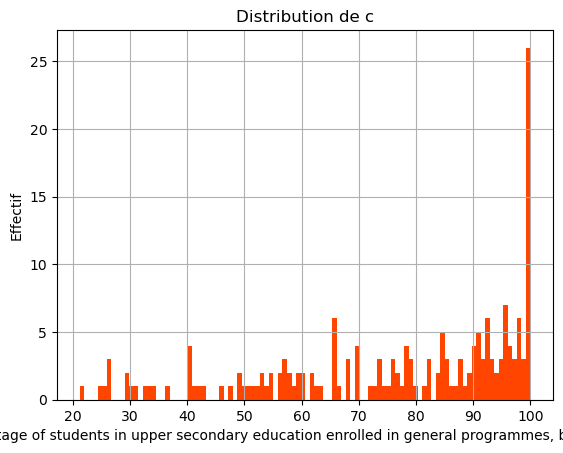

La valeur la + frequente est.... .. 0   100.00
Name: Percentage of students in upper secondary education enrolled in general programmes, both sexes (%), dtype: float64
Le skew est........................ -0.82
Le kurtosis est................... -0.42 

P95 est............... 100.0
Quartile 3 est........ 95.65
Quartile 2 est........ 84.14
Quartile 1 est........ 60.8
L interquartile est... 34.85 

L ecart type est...... 21.98
Le seuil haut est..... 147.93
Le seuil bas est...... 8.52 

La mediane est........ 84.1381072998047
La moyenne est........ 76.72 

############################################ 



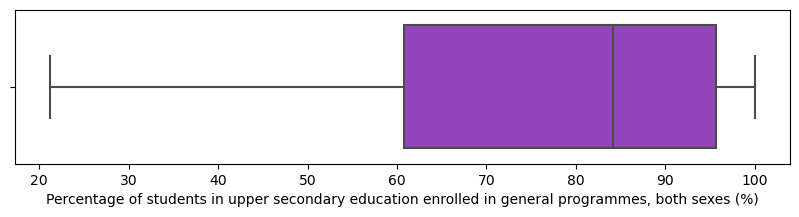

Selon la methode de l interquartile il y a 0 valeurs aberantes

#var 1 : liste contenant les valeurs aberantes

#var 2 : dataframe contenant les valeurs aberantes

#var 3 : dataframe SANS les valeurs aberantes

############################################ 

Selon la methode du zscore, il y a 0 valeurs aberantes

#var 4 : liste contenant les valeurs aberantes zscore

#var 5 : dataframe contenant les valeurs aberantes zscore

#var 6 : dataframe SANS les valeurs aberantes



([],
 Empty DataFrame
 Columns: [Country Name, Country Code, Internet users (per 100 people), Percentage of students in upper secondary education enrolled in general programmes, both sexes (%), Personal computers (per 100 people), Population, total, Region]
 Index: [],
             Country Name Country Code  Internet users (per 100 people)  \
 0            Afghanistan          AFG                            10.60   
 1                Albania          ALB                            66.36   
 2                Algeria          DZA                            42.95   
 3                 Angola          AGO                            13.00   
 4    Antigua and Barbuda          ATG                            73.00   
 ..                   ...          ...                              ...   
 202              Vanuatu          VUT                            24.00   
 203        Venezuela, RB          VEN                            60.00   
 204   West Bank and Gaza          PSE                 

In [112]:
ludo.outlierbox(df2_country,'Percentage of students in upper secondary education enrolled in general programmes, both sexes (%)')

In [115]:
list_col2 = df2_country.columns[2:-2].tolist()


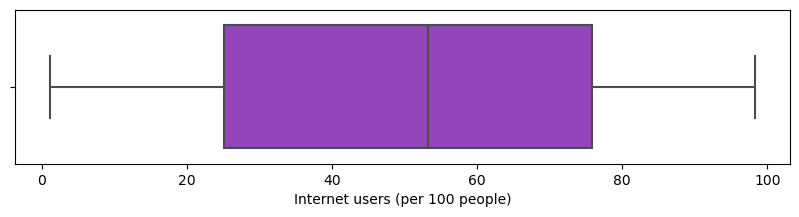

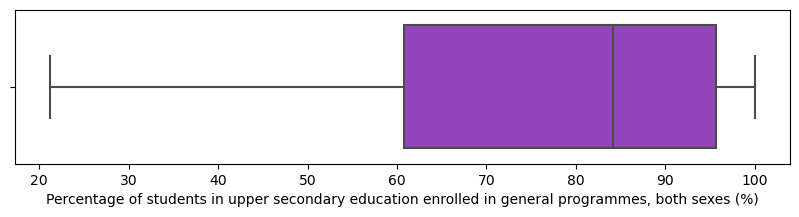

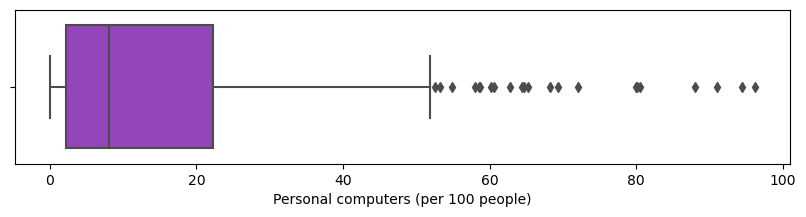

In [116]:
for c in list_col2:
    plt.figure(figsize=(10,2))                                      # boxplot
    sns.boxplot(data=df2_country, x= c, color='darkorchid')
    plt.show()